# <span style="color:red">**Question Answering**</span>

In this project, you will learn how to finetune and use pretrained **deep learning models**, a prominent technique used nowadays in the Natural Language Processing field. These models of interest are usually called **Transfomers**.

In particular, you will learn how to develop a model of the BERT (Bidirectionnal Encoder Representation Transformer) family to perform **Question Answering**. **Question Answering** is a specific field of Computational Linguistics that can be described as the ability of Computer to answer a question based on a given context. As a reminder, a question is something that you say or write in order to ask a person (or in our case a computer) about something. The context in the case of Question Answering here can be a paragraph, a little sentence or even a full text in which the informations required to answer the question are located.

In this task, we will use one possible form of **Question Answering** but keep in mind that there are several ways to model **Question Answering** as a task. Here, each question will be represented by a small sentence ended by a questionmark and each context will be a little paragraph containing one or more sentences. To be able to determine where the answers are located in the context, the answers will be given as the text part corresponding to the answer in the context and the position of the starting word in the context.

Here is an example of a question, the context and the answer (extracted from the dataset you will use):

* **Question**: What is the oldest structure at Notre Dame?
* **Context**: The university is the major seat of the Congregation of Holy Cross (albeit not its official headquarters, which are in Rome). Its main seminary, Moreau Seminary, is located on the campus across St. Joseph lake from the Main Building. Old College, the oldest building on campus and located near the shore of St. Mary lake, houses undergraduate seminarians. Retired priests and brothers reside in Fatima House (a former retreat center), Holy Cross House, as well as Columba Hall near the Grotto. The university through the Moreau Seminary has ties to theologian Frederick Buechner. While not Catholic, Buechner has praised writers from Notre Dame and Moreau Seminary created a Buechner Prize for Preaching.
* **Answer**:
    * **Text**: Old College
    * **Starting word position**: 234


## <span style="color:#ff5500">Software requirements</span >

The deep learning library used in this project is PyTorch, a free and open-source framework.

This project can either be done on your computer or on Google Colab, but to be trained in reasonable amount of time, it **requires** a GPU.

###  <span style="color:#ff8800">A. Recommended choice: using Colab</span >

Using Google Colab to complete the assignment is your best bet for a hassle
free experience on this project. In order to get you started as smoothly
as one possibly can, here are the things you should know about Colab
to get you started for this project:

##### <span style="color:#ffcc00">Hardware acceleration</span >

As you may already know (if not, you will soon !), training neural networks is a computationally very expensive task. This is why using specific hardware is highly beneficial during training (but it is sometimes tricky to get properly configured).  With that respect, Colab provides you with free to use preconfigured hardware you can use to train your models.

In particular, it gives you an opportunity to train your model using either:

- a CPU (aka Cental Processing Unit; this is your slowest option)
- a GPU (aka Graphical Processing Unit; which is much faster !!)
- a TPU (aka Tensor Processing Unit; even faster, but chances are you won't get access to them since they are allocated to paid customers first. In addition, they are not compatible with a specific library we use.)

By default, your Colab Notebook is running on a session whose python interpreter only uses a CPU (no GPU/TPU available). To change that and use a GPU enabled session you should click on the resources usage summary (top right of this window). To be complete, you should click first on "Connect" to see the ressources. Notice that you could sometimes not have access to the GPUs on Colab, don't panic, just wait some hours until it is available.  


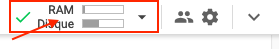


This will open a panel on the left of your browser where you can chose to "Modify execution type". And then select the kind of hardware acceleration you want to use. Select GPU to be able to execute the project.

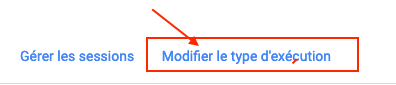

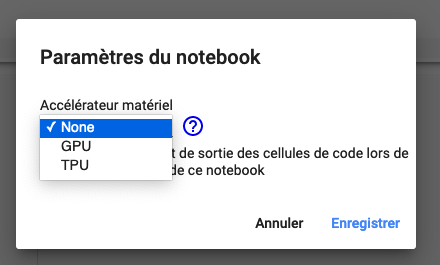

##### <span style="color:#ffcc00">Saving models locally on your drive</span>

To allow you to save models you trained locally, the library **transformers** that you will use in this project have a particular method that can be applied directly on the model:

```python
model.save_pretrained("path/to/model")
```
But as you can see, this method requires a path to the directory where you want to save your model. In order to do that, in Colab, you need to mount your google drive to be able to have a repository where you can store data. Here is the snippet to do it properly on Colab.

```python
from google.colab import drive
drive.mount('/content/drive')
```

[1]:<https://colab.research.google.com/drive/1ED9R0myY9WXcTTz-3tAwqkKuMwEariiL?usp=sharing>



### <span style="color:#ff8800">B. Other choice: Locally on your machine</span>

Should you decide to install the software on your own machine; then the
**very first step** of this project would consist in installing [PyTorch][2]
on your machine. You can use the generated command (while clicking on PyTorch link) but first read the next lines.

Please note that if you don't have a GPU with 16GB of RAM, you should not try to train models you will built in this projet locally. Also note that depending on the type of GPU (NVIDIA vs AMD), your installation of PyTorch will differ a bit so be cautious about the compute platform you have. Finally, note that the torchaudio and torchvision libraries are not required for this project.

### <span style="color:#ff8800">C. Libraries</span>

Several other libraries are required for this project:
* [transformers][3]
* [datasets][4]
* [evaluate][5]
* [accelerate][6]

##### <span style="color:#ffcc00">Installation of libraries in Colab </span>

To install all those libraries on Colab direclty, you can use this snippet in a python cell of your notebook:

```python
!pip install numpy torch transformers datasets evaluate accelerate
```

##### <span style="color:#ffcc00">Installation of libraries locally </span>

To install all those librairies locally, ideally, you should be able type those commands on the terminal (note that the command for torch should have already been done before):
```sh
pip install numpy
pip install transformers
pip install datasets
pip install evaluate
pip install accelerate
```

[2]:<https://pytorch.org/get-started/locally/>
[3]:<https://huggingface.co/docs/transformers/index>
[4]:<https://huggingface.co/docs/datasets/index>
[5]:<https://huggingface.co/docs/evaluate/index>
[6]:<https://huggingface.co/docs/accelerate/index>

In [1]:
!pip install numpy torch transformers datasets evaluate accelerate

## <span style="color:#ff5500">**Part one:** Data acquisition

In this part of the project (Question 3.1 -> 3.5), you will learn how to load and to preprocess a dataset with Huggingface libraries. A Dataset from Huggingface contains the data in a data structure similar to a Python dictionnary.

### <span style="color:#ff8800">Data obtention</span>

To get an easy access to an open-source dataset, an easy method consists in using the Huggingface library called **datasets**. For this project, we will use the [Stanford Question Answering Dataset (SQuAD)][1], a question answering dataset used to benchmark question answering models. Here is how to load the SQuAD dataset:

```python
from datasets import load_dataset
squad_dataset = load_dataset("squad")
```

[1]:<https://huggingface.co/datasets/squad>

In [2]:
from datasets import load_dataset
squad_dataset = load_dataset("squad")

## Very important
SQuAD dataset contains some annotation errors. To solve this issue, below is a filter to remove those elements from both train and validation split. You will need to download this [csv file][1] in order to be able to load the indices to remove (if the link don't work, go to the first task of the project on Inginious). Once downloaded on your local machine, you should upload it to your google drive to have access to it via Colab.

[1]:<https://inginious.info.ucl.ac.be/course/LINFO2263/project3a/indices.csv>

In [3]:
import csv
path = "./indices.csv"
indices_to_remove_train = []
indices_to_remove_valid = []
with open(path) as f:
    reader_obj = csv.reader(f)
    indices_to_remove_train = list(map(int, next(reader_obj)))
    indices_to_remove_valid = list(map(int, next(reader_obj)))

train_dataset = squad_dataset["train"]
train_dataset = train_dataset.filter(lambda example, idx: idx not in indices_to_remove_train, with_indices=True)

validation_dataset = squad_dataset["validation"]
validation_dataset = validation_dataset.filter(lambda example, idx: idx not in indices_to_remove_valid, with_indices=True)


### <span style="color:#ff8800"> Question 1: Dataset size</span>
Here, the squad_dataset is splitted into two splits, the Training split, to train the model, and the Validation split, to evaluate its performance across epochs of training. Both splits contains data that are stored as rows in the dataset. Each row contains several fields (id, title, context, question, answers) that we will called the **features** of the dataset.

What are the number of rows of those two splits respectively ? Replace the actual values with those you found.


In [4]:
train_size = len(train_dataset)
#print(train_size)

validation_size = len(validation_dataset)
#print(validation_size)
q1_dataset_size = {"train": train_size, "validation": validation_size}
print(q1_dataset_size)

{'train': 87357, 'validation': 10536}


### <span style="color:#ff8800">Question 2: Content</span>

What is the value of the feature "id" of the row at index 172 of the train split of the squad dataset? What is the value of the feature "title" of it?

Replace the actual values with those you found


In [5]:
q2_content = {"id": train_dataset['id'][172], "title": train_dataset['title'][172]}
print(q2_content)

{'id': '5733a55a4776f41900660f3b', 'title': 'University_of_Notre_Dame'}


## <span style="color:#ff5500">**Part two**: Data tokenization</span>

### <span style="color:#ff8800">Introduction to tokenizers</span>

To use a given pretrained transformer model, one needs to load its associated tokenizer in order to format the dataset correctly for the given model and its associated task. In this task, the **!only preprocessing step!** that we will ask you to do is to tokenize the dataset.

Before getting into what you will do, let's explain what a [tokenizer from transformers library][8] does. It is a tool that, for example, allows you to:

1) Split words string into sub-words token strings and back (Note that a large part of the sub-words token strings will not be splitted but still be considered as sub-words tokens => sub-words token string can be either a splitted or an unsplitted word string)

2) Convert sub-words tokens strings into ids (integers) and back

3) Add new tokens to the vocabulary (ex: [CLS], [SEP], [PAD], ...)

Depending on the parameters given to the tokenizer, it can do a lot of other things. Note that the combination of step 1. and 2. is called encoding/decoding depending on the way in which it is perform. **Split => Convert** is encoding, while **Unconvert => Unsplit** is decoding.


### <span style="color:#ff8800">Task specific tokenizer</span>
Here, we will use DistilBERT, a distilled version of BERT (in case you want to know more about distillation process: https://en.wikipedia.org/wiki/Knowledge_distillation):

```python
from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
```

Now that you have your [tokenizer][6] (a modified version of the [WordPiece tokenizer][7]), in this part, we will ask you to use it to tokenize the Dataset. It will allow you to train and evaluation the Question Answering version of DistilBERT (i.e. the DistilBERT model with the little modifications at the last layers of the model to be able to handle Question Answering task).

To do it, you should first use the correct parameters of the tokenizer to, for any question+context pairs present in your dataset, be able to tokenize it this way:

**<p align=center>[CLS] question tokens [SEP] context tokens [SEP]</p>**

As the tokenizer and the model can only treat a fixed maximum length, sometimes, the context is longer than this length. To handle those cases, we ask you to generate several overlapping questions+contexts pairs from one context.

### <span style="color:#ff8800">Tokenizer parameters</span>

In this project, the tokenizer can be separated into two parts. Firstly, a truncation part where the question+context pairs are truncated so as not to exceed a given length. Secondly, the [WordPiece][11] part, which is the part that transforms the word tokens present in the truncated question+context pairs into sub-word tokens.

For questions 1, 2, 3 and 4 of this part, we ask you to fix several parameters (for the sake of reproducibility and understanding) of the tokenizer to the specific value we give here:

- **[stride][1]** (the number of overlapping tokens between two successive chunks): 50
- **[max_length][2]** (the maximum size to be treated by the tokenizer): 100
- **[padding][3]**: "max_length"
- **[return_overflowing_tokens][4]**: True

Before launching into the following questions, ask yourself this question for each of the parameters you are going to work with for your tokenizer: **Which of the two parts of the tokenizer (Truncation or [WordPiece][11]) concerns this parameter?**

While other outputs will be added in the following section by introducing task-specific parameters, here is a description of the outputs of the tokenizer you will use:

* ***input_ids***: The list of sub-words token ids to be fed to the model.
* ***attention_mask***: A list of 0's and 1's, sub-words tokens being 0's while [PAD] tokens are set to 1. It allows the model to focus its attention only to the useful tokens. Its return is due to **padding** parameter being set.
* ***overflowing_to_sample_mapping***: A list of integers working as a map that, for the index of a token sequence returned by the tokenizer, returns the corresponding original sample in the dataset. You will better understand how it works with the example at question 4 of this part.


>**Note:** Each name of parameter is clickable with a link to their documentation. It could be useful to understand what each parameter of this tokenizer does.

>**Hint:** Try to create a first basic tokenizer with this parameters to see what you can get, and try it on a example of question and context for instance. To be able to decode the tokens, take a look at functions [convert_ids_to_tokens()][10] and [decode()][5] from the tokenizer.

[1]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call__.stride>
[2]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call__.max_length>
[3]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call__.padding>
[4]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call__.padding>
[5]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.decode>
[6]:<https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertTokenizer>
[7]:<https://paperswithcode.com/method/wordpiece>
[8]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#tokenizer>
[9]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.sequence_ids>
[10]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.convert_ids_to_tokens>
[11]:<https://paperswithcode.com/method/wordpiece>

In [6]:
from transformers import AutoTokenizer

model_checkpoint = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [7]:
# tokenizer with required parameters
# source : ttps://huggingface.co/docs/datasets/use_dataset
def tokenize_func(row):
  return tokenizer(row['question'],
                   row['context'],
                   stride=50,
                   max_length=100,
                   padding="max_length",
                   return_overflowing_tokens=True,
                   return_offsets_mapping=True, # to keep original index
                   truncation='only_second'
                   )

### <span style="color:#ff8800">Question 1: Truncation</span>

To allow to truncate the dataset with the stride we described, you need to cut the context (not the question) in several parts if too long. To do so, you will use the truncation parameter from your tokenizer, but what type of truncation will you use?
Don't forget to add the truncation parameter with its corresponding value to your tokenizer.




Give the value it should have to tokenize correctly in the following format:

>**Note:** Note that the "tokenizer" variable created in the previous cell is a callable object that requires several parameters. Therefore, you should directly call tokenizer(p1, p2, p3, ...) with all the parameters you need to set.

>**Hint**: Don't hesitate to test your tokenizer with an example of question and context. When doing it, you will be able to understand what this parameter really does. Also, take a look at the documentation of the [\_\_call\_\_() function][1] of the tokenizer to determine which parameter you should use.



[1]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call__>

In [8]:
# q + c pairs and context can sometimes exceed the max length, so apply strategy on second
truncation_q1 = {"truncation": "only_second"}
print(truncation_q1)

{'truncation': 'only_second'}


Remember the question you should ask yourself (here it is quite obvious): **Which of the two parts of the tokenizer (Truncation or WordPiece) concerns this parameter?**

###  <span style="color:#ff8800">Question 2: Mapping</span>

The dataset contains the start index (the first character) of the answer to the question **in the context**. However, when you perform a tokenization, the length of the context will increase, resulting in a different size for the tokenized context. This is due to the fragmentation of some word tokens into subword tokens by [the tokenizer of the version of DistilBERT we use][2], a modified version of [WordPiece][3].

Because of this fragmentation, finding the sub-word token that is the start of the answer and the sub-word token that is the end of the answer is hard. In fact, the index of the start of the response is that of the first character of the response starting from the start of the context. The problem is that this index is in the original dataset, which has not yet been tokenized. To find the correspondence between the indices and the sub-word tokens generated by the WordPiece part of the tokenizer, it could be useful to have a mapping between the start and end characters in the original dataset of each sub-word token in the new tokenized dataset. For a given sentence: "This sub-word is a token", if its tokenized equivalent is: "This" "sub" "##-" "##word" "is" "a" "token", then the mapping would be: [(0,3),(5,7),(8,8),(9,12),(14,15),(17,17),(19,23)]. A parameter of the tokenizer allow to do this mapping during the tokenization process, what is this parameter?

Don't forget to add this parameter to your tokenizer.

Give the name of the parameter in the following format:

>**Hint**: Don't hesitate to test your tokenizer with an example of question and context. When doing it, you will be able to understand what this parameter really does. Also, take a look at the documentation of the [\_\_call\_\_() function][1] of the tokenizer to determine which parameter you should use.



[1]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.PreTrainedTokenizer.__call__>
[2]:<https://huggingface.co/docs/transformers/model_doc/distilbert#transformers.DistilBertTokenizer>
[3]:<https://paperswithcode.com/method/wordpiece>

In [9]:
mapping_q2="return_offsets_mapping"
print(mapping_q2)

return_offsets_mapping


Remember the question you should ask yourself: **Which of the two parts of the tokenizer (Truncation or WordPiece) concerns this parameter?**

### <span style="color:#ff8800">Question 3: Keys of tokenized dataset</span>

When you perform tokenization with a tokenizer from Huggingface, the format of the output of the tokenizer is a Python dictionnary. What are the keys of this dictionnary returned when you perform the tokenization on the dataset (you can have it by tokenizing only one example)?

As shown below, the format of your answer should be a set containing the name of all keys. Order of elements does not matter.


### <span style="color:#ff8800">Question 4: Example</span>

With a tokenizer, you can tokenize more than one question+context at a time. To do so, you need to provide a list of question and a list of context to it.
Tokenize the 6 first questions+contexts of the train split of the squad dataset. Due to the effects of the parameters we discussed earlier that concerns the truncation part of the tokenizer, several tokenized questions+contexts pairs can appear for a unique original question+context pair.

Provide a list that maps each tokenized question+context to its corresponding original question+context. This list should have a length equal to the number of tokenized questions+contexts, and each value of it should be either 0, 1, 2, 3, 4 or 5 based on his mapping to the original questions+contexts.


**Example:** You tokenize 2 questions+contexts, and you get 5 tokenized questions+contexts. The provided list could be of this form: [0, 0, 0, 1, 1] if the 3 first tokenized questions+contexts correspond to the first non-tokenized question+context and the 2 last tokenized questions+contexts correspond to the second non-tokenized question+context.

Your answer should be a list of integers (Order of elements matters here).
>**Hint**: To get this mapping, look at the parameters you use in your tokenizer **that have not been discussed yet in question 1 and 2** and above all at the outputs returned by the tokenization, it could be very useful.

>**Hint 2**: This mapping clearly concerns the Truncation part of the tokenizer. What parameters and outputs concern the Truncation part ?

In [10]:
# tokenize the first 6 rows
def tokenize_rows(data):
    """
      Input   : datasets object
      Returns : list of encoded rows
                mapping to original content
                total number of sequences
    """
    maps = {}
    tokenized_rows = []

    for i, row in enumerate(data):
      encoded_sequence = tokenize_func(row)
      tokenized_rows.append(encoded_sequence)
      print(encoded_sequence['overflow_to_sample_mapping'])

      maps[i] = len(encoded_sequence['input_ids'])

    # print keys
    print("Keys = \n",set(tokenized_rows[0].keys()))

    # get total sequences
    total = sum(maps.values())

    return tokenized_rows, maps, total

#first_6_rows = train_dataset.select(range(6))
#encoded_6_rows, maps_6_rows, total_sequences_6 = tokenize_rows(first_6_rows) # list of input_ids

#list_maps_6_rows = [key for key, value in maps_6_rows.items() for _ in range(value)]

#print("\n Mappings : \n", list_maps_6_rows)
#print("\n Counts \n", total_sequences_6)

In [11]:
tokenized_6_rows = tokenize_func(train_dataset[:6])
print("Mappings : \n",tokenized_6_rows['overflow_to_sample_mapping']) # sample mapping
print("\n Keys : \n",set(tokenized_6_rows.keys()))

Mappings : 
 [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5]

 Keys : 
 {'attention_mask', 'offset_mapping', 'input_ids', 'overflow_to_sample_mapping'}


In [12]:
def decode_6_rows(data):
    decoded_texts = []
    for sample in data:
        # go through each sequence
        for sequence_ids in sample['input_ids']:
            # convert id => token
            tokens = tokenizer.convert_ids_to_tokens(sequence_ids)

            # decode to text
            decoded_text = tokenizer.decode(sequence_ids)
            decoded_texts.append(decoded_text)

    [print(sequence) for sequence in decoded_texts]

    return decoded_texts

#decoded_6_rows = decode_6_rows(encoded_6_rows)

### <span style="color:#ff8800">Question 5: Tokenized dataset size</span>

In the previous questions, you have worked with examples to understand all the parameters used in the tokenizer for this problem. Now, you should be able to tokenize the whole dataset.
Once you have tokenized both Training split and Validation split, both must have increased in terms of size, as we already described in previous exercises. How much did this impact the datasets?


For both Training set and Validation set, compute the difference in the number of question+context (i.e. their length) between raw dataset and tokenized one. Your answer should be the result of **new_size - raw_size** for each dataset. For this question and until the end of the project, we will ask you to change the values of some parameters of the tokenizer to test it with a more optimized set of parameters than the one used in previous questions for understanding purposes:

* **max_length**: 384
* **stride**: 128

Please follow the format below for your answer. The integers must correspond to computed difference instead of 200 here.

In [13]:
# redefine tokenizer with new required parameters
# source : https://huggingface.co/docs/datasets/use_dataset

def tokenize_func(question, context):
  return tokenizer(question,
                   context,
                   stride=128,
                   max_length=384,
                   padding="max_length",
                   return_overflowing_tokens=True,
                   return_offsets_mapping=True, # to keep original index
                   truncation='only_second'
                   )
#tokenized_trainset, train_mappings, train_totals = tokenize_rows(train_dataset)

In [14]:
#delta_train = train_totals - train_size
#print("Size difference between new and raw train size: \n", delta_train)

In [15]:
#tokenized_validationset, validation_mappings, validation_totals = tokenize_rows(validation_dataset)

#delta_validation = validation_totals - validation_size
#print("Size difference between new and raw validation size: \n", delta_validation)

In [16]:
#dataset_size_q5 = {'training':delta_train, 'validation':delta_validation}
#print(dataset_size_q5)

In [17]:
def get_original_answer_index(row):
    print(row)
    
    start = row['answers']['answer_start'][0]
    end = len(row['answers']['text'][0]) - 1
    
    return (start, start + end)

In [18]:
def test_answer_idx(row):
    context = row['context']
    question = row['question']
    tokens = tokenize_func(question, context)
    answer = get_original_answer_index(row)
    sc = answer[0]
    ec = answer[1]
    print(tokenizer.decode(tokens['input_ids'][0]))
    
    print("Answer : \n ",answer)
    seq_ids = tokens.sequence_ids()
    print(seq_ids)
    start = seq_ids.index(1)
    end = start + seq_ids[start:].index(None)
    print("\n start context:",start,"end context : ",end)
    dt = tokens['offset_mapping'][0][start:end]

    print(seq_ids[end - 1])
    print(tokens['offset_mapping'])
    
    offset = tokens['offset_mapping'][0]

    if sc < offset[start][0] or ec > offset[end - 1][1]:
        start_index = 0
        end_index = 0
    else:
        start_index = next(idx for idx, (start, _) in enumerate(dt) if start == sc) + start
        end_index = next(idx for idx, (_, end) in enumerate(dt) if end == ec) + start
        
    print("index :\n", (start_index , end_index ))

#test_answer_idx(train_dataset[12150])

## <span style="color:#ff5500">**Part three**: data labeling</span>

The tokenization itself does not provide a useable dataset for the model. The labels still need to be generated.

In general, a label is the element we try to predict using a Machine Learning model. It can take many forms depending on the applications. In simple words, it is the thing we're predicting (the y variable in simple linear regression).

In the context of Question Answering task, a **label** is a **pair of integer values** defined as follow with start_position and end_position being the **indices of the !!sub-word tokens!!** at the start of the answer and where the answer ends in the tokenized dataset:

* **(0,0)**: if the answer is not or partially not in the part of the context being considered (remember that when some of the contexts are truncated, therefore, the answer can sometimes be truncated too).
* **(start_position, end_position)**: if the answer is fully in the part of the context being considered

>**Note**: The smallest position possible here is (0,0) and it is occupied by the [CLS] token, meaning that the only answers that should be predicted as (0,0) should be the one not or partially in the part of context being considered. Also, note that sometimes, start_position is equal to end_position, when the answer is composed of only one token, such as in the example below.

________
**Here is an example:**

* The question is "*Which year did the USSR cancel the N1 rocket program after two failures that didn't launch?*"
* The context is "*Meanwhile, the USSR continued briefly trying to perfect their N1 rocket, finally canceling it in 1976, after two more launch failures in 1971 and 1972.*"
* The answer is :
    * Text: "*1976*"
    * Answer_start: "*97*"
* The tokenized question+context pair is composed of only one part:

"\[ '[CLS]', 'Which', 'year', 'did', 'the', 'USSR', 'cancel', 'the', 'N', '##1', 'rocket', 'program', 'after', 'two', 'failures', 'that', 'didn', "'", 't', 'launch', '?', '[SEP]', 'Meanwhile', ',', 'the', 'USSR', 'continued', 'briefly', 'trying', 'to', 'perfect', 'their', 'N', '##1', 'rocket', ',', 'finally', 'cancel', '##ing', 'it', 'in', '1976', ',', 'after', 'two', 'more', 'launch', 'failures', 'in', '1971', 'and', '1972', '.', '[SEP]', '[PAD]', '[PAD]', ..., '[PAD]']"
_______
(1) In this example, the answer is fully inside the context, therefore the label should be (start_position, end_position) which here is (41,41) (starting from (0,0) for the [CLS] token). Please note that (41, 41) is the position of the **sub-word token** "1976" in the tokenized question+context pair, while 97 here is the index of the first character, "1", in the original context (not the question+context pair). However, we expect you to construct the labels based on the sub-word tokens. For your information, this example is the element at index 12245 of the non-tokenized training split of the dataset.

(2) In this example, with a different question such as "When did the two launch failures occured ?" and a maximum length before truncation smaller, we could have had the "1972" sub-word token out of this part of the tokenized question+context pair, therefore, for this part, the label would have been (0,0) as instructed before.

>**Note:** If the **max_length** and **stride** parameter of the tokenizer were smaller, then the tokenized context could be truncated in several fragments. This would have allowed the possibility to have the answer not fully included in some tokenized context fragments. In such a case, the labeling of some fragments would be (0,0).

> **Important Remark**: Up to now, you've probably used up to 11Gb of RAM (the part of the computer's memory that allows you to retain and quickly access variables during code execution), which is just about the maximum possible for Colab.
In the following questions, we'll give you some snippets to help you reduce this memory usage. To prevent your Colab from crashing, we advise you to restart your Colab session and not to run the cells you've coded which process the whole dataset at once. The snippets provided will enable you to use the function you're about to build on the whole dataset, but generatively, i.e. part by part, without loading the whole dataset into memory at once. From now on, you may restart the project from here, without running the first parts (except for the imports and the dataset loading).


### <span style="color:#ff8800">Question 1: Function for labeling</span>

Provide here a function named **labeling_dataset** that takes as argument **dataset**, a *Dataset* type from huggingface, that contains as features ['id', 'title', 'context', 'question', 'answers'] and has not been tokenized yet. The function must return the dataset tokenized and labelized. In addition to the labeling, we ask you to store the ids of the questions+contexts in the dataset
(Note: As you can see, each question+context in the dataset has a unique id which is one of the feature)

This returned dataset must contain those keys:

* 'input_ids': the input_ids returned by the tokenizer
* 'attention_mask': the attention_mask returned by the tokenizer
* 'offset_mapping': a modified version of the offset_mapping returned by the tokenizer reduced to the context part of it
* 'question_context_ids': the ids of the correponding questions+contexts
* 'start_positions': the first parts of the labels used for training
* 'end_positions': the second parts of the labels used for training
* 'context_th': the original context (for theoretical context later)
* 'answers_th': the original answers (for theoretical answers later)

Do not forget that the mappings you got from the tokenizer are essential here.

For this question, we give you the function you should complete to be able to answer the following questions. In this function, a comment TODO with the explanation of what you should do is inserted in the code each time you should do something, and "..." is inserted where you should code. Be careful not to remove anything, just to complete the code.

> **Important Remark**: To find out whether a label is in context, we need to be able to determine where the context begins and ends in the tokenized pair of question+context. To do this, it is possible to detect where the two tokens are [SEP] and say that the context is between them. But again, instead of doing this manually, it's also possible, via the tokenizer output, to determine this automatically. To help doing so, look at the [sequence_ids()][1] function which can only be applied on the output of a tokenizer. In the slides of the course, this method is refered as segment embedding and this function codes the segment embedding as this: the token is 0 if it is in the question and 1 if it is in the context.

> **Note:** The tokenizer is not an argument of the function. We ask you to define it globally in your code. Also note that the arguments from the tokenizer should be exactly the same as in the last question.

[1]:<https://huggingface.co/docs/transformers/main_classes/tokenizer#transformers.BatchEncoding.sequence_ids>

In [19]:
max_length = 384
stride = 128


def labeling_dataset(dataset):

    # TODO: Extract questions from the dataset
    questions = dataset.pop('question')

    # TODO: Extract contexts from the dataset
    contexts = dataset.pop('context')

    # TODO: Tokenize the questions and contexts using the tokenizer
    tokenized_dataset = tokenizer(questions,
                   contexts,
                   stride=stride,
                   max_length=max_length,
                   padding="max_length",
                   return_overflowing_tokens=True,
                   return_offsets_mapping=True, # to keep original index
                   truncation='only_second'
                   )

    # TODO: Get the offset mapping contained in the tokenized_dataset
    offset_mapping = tokenized_dataset['offset_mapping']

    # TODO: Extract a sample map defining the correspondence between a
    # truncated question+context pair and the id of the original
    # question+context pair (i.e. the original dataset before truncation)
    sample_map = tokenized_dataset.pop('overflow_to_sample_mapping')

    # Get answers from the examples
    answers = dataset["answers"]

    # Initialize lists to store start and end positions of answers
    start_positions = []
    end_positions = []

    # Initialize a list to store the context IDs
    question_context_ids = []

    # Initialize lists to store the contexts and answers to build the theoretical answers later
    contexts_th = []
    answers_th = []

    # Loop through the offset mappings
    for i, offset in enumerate(offset_mapping):

        # TODO: Get the index of the original sample associated with the curent
        # iteration of the loop
        sample_idx = sample_map[i]

        # Get the id of the context
        question_context_ids.append(dataset["id"][sample_idx])

        # TODO: Get the answer for the current sample
        answer = answers[sample_idx]

        # Save the answer and context for the theoretical answer
        contexts_th.append(contexts[sample_idx])
        answers_th.append(answer)

        # TODO: Get the start and end character positions of the answer
        start_char = answer['answer_start'][0]
        end_char = start_char + len(answer['text'][0])

        # Get the sequence IDs for the current input
        # TODO: !!!Please, read the doc of sequence_ids to understand what it does!!!
        sequence_ids = tokenized_dataset.sequence_ids(i)

        # TODO: Find the start and end positions of the context in the sequence
        context_start = sequence_ids.index(1)
        context_end = context_start + sequence_ids[context_start:].index(None) - 1

        # TODO: If the answer is outside the context, append 0s to start_positions and end_positions
        # Hint: Use the offset to find the context positions.
        # check if start and end is in any of the tuples

        if start_char < offset[context_start][0] or end_char > offset[context_end][1]:
            start_positions.append(0)
            end_positions.append(0)
        else:
            start_index = 0
            end_index = 0
            for idx, mapping in enumerate(offset[context_start:context_end + 1]):
                if mapping[0] == start_char:
                    start_index = idx
                if mapping[1] == end_char:
                    end_index = idx
                    break
            
            # TODO: Find the start position (as a token index) of the answer within this context fragment
            start_positions.append(start_index + context_start)

            # TODO: Find the end position (as a token index) of the answer within this context fragment
            end_positions.append(end_index + context_start)

        # Only keep offsets that corresponds to the context, remove those from the questions
        # For validation performance computation later, one will only look for the answer
        # somewhere in the context, not from the question or [CLS], [SEP] or [PAD]
        tokenized_dataset["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    # Add start_positions and end_positions to the tokenized_dataset dictionary
    tokenized_dataset["start_positions"] = start_positions
    tokenized_dataset["end_positions"] = end_positions
    tokenized_dataset["question_context_id"] = question_context_ids
    tokenized_dataset["contexts_th"] = contexts_th
    tokenized_dataset["answers_th"] = answers_th

    # Return the modified tokenized_dataset
    return tokenized_dataset


Once your **labeling_dataset** function is done, you should be able to apply it on each elements of both datasets using the snippets below.

In [20]:

train_dataset = train_dataset.map(
    labeling_dataset,
    batched=True,
    remove_columns=train_dataset.column_names,
)
validation_dataset = validation_dataset.map(
    labeling_dataset,
    batched=True,
    remove_columns=validation_dataset.column_names,
)

In [21]:
import resource

# Get memory usage in bytes
mem_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
print(f"Memory usage by Python kernel: {mem_usage / (1024 * 1024):.2f} MB")  # Convert to MB


Memory usage by Python kernel: 0.52 MB


### <span style="color:#ff8800">Question 2: Labels (1)</span>

To test the labelization of the training data, we will ask you to generate several labels in the following questions.

Replace the pair of values below by the label for the question+context at index 4242 of the **tokenized** training dataset.




In [22]:
answer_4242 = train_dataset[4242]['start_positions'],train_dataset[4242]['end_positions']
print(answer_4242)
#print(train_dataset[4242]['question_context_id'])

(247, 250)


### <span style="color:#ff8800">Question 3: Labels (2)</span>

Replace the pair of values below by the label for the question+context at index 1203 of the **tokenized** training dataset.



In [23]:
answer_1203 = train_dataset[1203]['start_positions'],train_dataset[1203]['end_positions']
print(answer_1203)
#print(train_dataset[1203]['question_context_id'])

(16, 19)


### <span style="color:#ff8800">Question 4: Labels (3)</span>

Replace the pair of values below by the label for the question+context at index 1001 of the **tokenized** training dataset.


In [24]:
answer_1001 = train_dataset[1001]['start_positions'],train_dataset[1001]['end_positions']
print(answer_1001)
#print(train_dataset[1001]['question_context_id'])

(19, 20)


## <span style="color:#ff5500">**Part Four**: Compute metrics</span>

Here is a function called compute_metrics.
This function is supposed to take the logits (the values given by the model for each token corresponding to it starting or ending the answer) of the model and to keep the $n$ bests in term of start, and the $n$ bests in term of end. Here, $n$ must be set to **20**

After that, for each combination of start and end indexes in those $n$ bests, the function aims at removing answers that wouldn't be inside the context, that have negative length, or that are too long (the limit for an answer should be set to **30** here) and it stores each answer text and logit_score (start_score+end_score). Once done, it keeps only the best answer in terms of logit_score.


This function takes as arguments:

* **start_logits**: a list of lists containing the encoded values corresponding to the plausibility for tokens to start the answer for each element of the dataset
* **end_logits**: a list of lists containing the encoded values corresponding to the plausibility for tokens to end the answer for each element of the dataset
* **processed_validation**: the output of the mapping of the function labeling_dataset on the whole validation dataset

You are asked to complete this function in order to make it work. The function must return the metrics. You should only replace the "**...**" in the function (The replacement can be longer than one line). Help yourself with the comments that are already present in the code.

On Inginious, your answer should only contain the function. Not the imports, not the global variables nor the loading of the metric for the dataset.

In [25]:
import evaluate
import collections
import numpy as np

metric = evaluate.load("squad")
n_best = 20
ans_max_len = 30 # We will only accept predicted answer which are not long
# (we do not want the model to predict the full context as an answer...)

def compute_metrics(start_logits, end_logits, processed_validation):

    # Create a dictionnary of lists to map the dataset_ids to the corresponding
    # indices of the features
    unprocessed_validation_to_processed_validation = collections.defaultdict(list)
    for idx, elem in enumerate(processed_validation):
        unprocessed_validation_to_processed_validation[elem["question_context_id"]].append(idx)

    # To avoid the duplicates due to the truncation of the contexts
    seen_ids = set()

    # Loop through the dataset
    predicted_answers = []
    for data in processed_validation:
        data_id = data["question_context_id"]

        # Avoid considering the duplicates due to the truncation of the context
        if data_id in seen_ids:
            continue
        seen_ids.add(data_id)

        context = data["contexts_th"]
        answers = []

        # Loop through all features associated with that example
        for elem_index in unprocessed_validation_to_processed_validation[data_id]:
            start_logit = start_logits[elem_index]
            end_logit = end_logits[elem_index]

            # Get the offsets from the labeled dataset
            offsets = processed_validation[elem_index]["offset_mapping"]

            # TODO: get the list of indices of the n_best scores in start_logit and end_logit
            start_indexes = np.argsort(-start_logit).tolist()[:n_best]
            end_indexes = np.argsort(-end_logit).tolist()[:n_best]
            for start_index in start_indexes:

                for end_index in end_indexes:
                    if end_index >= start_index:
                        # TODO: Skip predicted answers that are not fully in the context
                        # (a quick look at last lines of the for loop of labeling_dataset could help doing this)
                        if offsets[start_index] is None or offsets[end_index] is None: # since we replaced all other mappings with None
                            continue
                        # TODO: Skip predicted answers with a length that is > ans_max_len
                        # here we ask for len(offsets[start_index:end_index + 1]) which is the distance between end and start idx
                        if end_index - start_index + 1 > ans_max_len: # number of elements in the tokenized answer
                            continue
    
                        # TODO: "text" must be the text corresponding with the answer
                        # and "logit_score" must be the sum of both start and end logit scores
                        start_char = offsets[start_index][0] # first int in tuple
                        end_char = offsets[end_index][1] # second elem in tuple
                        answer = {
                            "text": context[start_char : end_char],
                            "logit_score": start_logit[start_index] + end_logit[end_index],
                        }
                        answers.append(answer)

        # TODO: Select the answer with the best score and handle case where there is no answer in answers
        # by returning an empty answer.

        if len(answers) > 0:
            best_answer = max(answers, key=lambda item: item['logit_score'])
            predicted_answers.append({"id": data_id, "prediction_text": best_answer['text'] })
        else:
            predicted_answers.append({"id": data_id, "prediction_text": ""})

    # Get the corresponding theoretical answers
    theoretical_answers = []
    ans = processed_validation["answers_th"]
    ids = processed_validation["question_context_id"]
    seen_ids = set()    # Avoid considering the duplicates
    for i in range(len(ans)):
        if ids[i] not in seen_ids:    # Save theoretical answer only if it is not a duplicate
            theoretical_answers.append({"id": ids[i], "answers": ans[i]})
            seen_ids.add(ids[i])

    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

## <span style="color:#ff5500">**Part Five**: Training and validation loop</span>

In this part, you are asked to complete the code below (i.e. replace the '...' in the code with your own code, with a replacement that can be longer than one line). This code should allow to train your model on the training split of the dataset using batches of data (combination of consecutives elements of the dataset into groups) and validate its performance on the validation split, also using batches of data. This training and validation by batches avoid loading too much data into memory at the same time as only a fraction of the data is used at each step of the training instead of the whole dataset.

The code below is separated into 2 different sections.

>**Note**: A part of both code sections uses the python library called **accelerate**. This is needed to speedup the code enough to be usable on the Colab calculation clusters. It uses different techniques that are not described in this course but for those interested, here is the [documentation][1] of the library.

[1]: <https://huggingface.co/docs/accelerate/index>

In [26]:
l = [
    {"text": "example text 1", "logit_score": 10},
    {"text": "example text 2", "logit_score": 15},
    {"text": "example text 3", "logit_score": 5}
    # Add more dictionaries as needed
]
print(max(l, key=lambda item: item['logit_score']))


{'text': 'example text 2', 'logit_score': 15}


### <span style="color:#ff8800">**Section One**: Dataloaders and hyperparameters</span>

In first section, we setup the [model][1], the [dataloaders][2], the [AdamW optimizer][3] for the gradient descent and finally the [scheduler][4] to manage the learning during the training process. In particular, we remove two columns from each dataloader -**question_context_id** and **offset_mapping**- as the [model][1] **does not allow** them in its [**forward()**][5] function.

You should fill the blanks with the conditions we give you here:

* The batch sizes for both training and validation dataloaders should be $8$
* The total number of training epochs must be set regarding the following questions
* The training dataset should be **shuffled**
* The learning rate of the optimizer should be $2\times 10^{-5}$
* The scheduler should be **linear**
* The scheduler should have $0$ warmup steps
* The number of training steps of the scheduler should be (the number of training epochs) $\times$ (the number of elements in the training dataset)

Nothing should be done that is not given **explicitly** in those conditions !

[1]: <https://huggingface.co/transformers/v3.0.2/model_doc/distilbert.html#transformers.DistilBertForQuestionAnswering>
[2]: <https://pytorch.org/tutorials/beginner/basics/data_tutorial.html>
[3]: <https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html>
[4]: <https://huggingface.co/docs/transformers/main_classes/optimizer_schedules#transformers.get_scheduler>
[5]: <https://huggingface.co/transformers/v3.0.2/model_doc/distilbert.html#transformers.DistilBertForQuestionAnswering.forward>

In [27]:
# SECTION 1: Dataloaders and hyperparameters

### Imports

from torch.utils.data import DataLoader
from transformers import get_scheduler, default_data_collator, AutoModelForQuestionAnswering
from torch.optim import AdamW
from accelerate import Accelerator
import torch


### Dataloaders

# Remove columns that are not allowed by the model

# Note: train_dataset and validation_dataset are of type DatasetDict and
# correspond to the train and validation splits of the squad_dataset
train_set = train_dataset.remove_columns(["question_context_id","offset_mapping", "contexts_th", "answers_th"])
train_set.set_format("torch")
validation_set = validation_dataset.remove_columns(["question_context_id","offset_mapping", "contexts_th", "answers_th"])
validation_set.set_format("torch")

# TODO: complete to meet conditions
train_dataloader = DataLoader(
    train_set,
    collate_fn=default_data_collator,
    batch_size=8,
    shuffle=True
)

# TODO: complete to meet conditions
val_dataloader = DataLoader(
    validation_set,
    collate_fn=default_data_collator,
    batch_size=8,
    shuffle=True
)


### Model and optimizer

model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)
# TODO: complete to meet conditions
optimizer = AdamW(model.parameters(), lr=2e-5) # learning rage of 2 * 10  -5


#############################################
#############accelerate part#################
accelerator = Accelerator(mixed_precision='fp16')
model, optimizer, train_dataloader, val_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, val_dataloader
)
##########end of accelerate part#############
#############################################


### Scheduler

# TODO: complete to meet conditions
num_train_epochs = 3
lr_scheduler = get_scheduler(
    optimizer=optimizer,
    name="linear",
    num_warmup_steps=0,
    num_training_steps= num_train_epochs * train_size
)

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['qa_outputs.weight', 'qa_outputs.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
print(torch.cuda.is_available())

True


###  <span style="color:#ff8800">**Section Two**: Training and validation </span>

In this section, the training and validation loop is built. For each epoch, a first loop iterates over each batch of the train dataloader. This is the training loop. Its objective, through backpropagation, is to minimize the loss of the model.

**Training loop:**

(1) You get the outputs of the model, and the loss stored in it.\
(2) Using it, the backpropagation of the gradient is done. \
(3) After that, you should update the parameters (i.e. the weights and biases).\
(4) Then, you should update the learning rate.\
(5) Finally, you should reset the gradients to prevent an accumulation.

Once the training loop has been perform, the model mode changes to evaluation (= validation) to verify if the model learns something through epochs. This validation loop iterates over each batch of the validation dataloader.

**Validation loop:**

(1) Each batch passes through the model, and the outputs are collected.\
(2) From those outputs, the start and end logits are extracted on the CPU in the form of [numpy][1] arrays and appended to lists of start and end logits.  

Once both lists are completed, the **compute_metrics** you created earlier should be able to compute both **exact-match** score and **f1-score** for this epoch. Note that the last line of the function **compute_metrics** computes automatically both the **exact-match** and **f1-score**. For those interested, here are some ressources to better understand both metrics:

* https://en.wikipedia.org/wiki/F-score
* https://www.v7labs.com/blog/f1-score-guide
* https://torchmetrics.readthedocs.io/en/stable/classification/exact_match.html
* https://mohitmayank.com/a_lazy_data_science_guide/natural_language_processing/qa/

[1]: <https://numpy.org/doc/stable/reference/generated/numpy.array.html>


> **NOTE**: Do **NOT** run the following cell without **rerunning** all the dataset processing and the creation of the model. If you don't, it will be like if you train your model for one more epoch.

In [ ]:
# (Optional, if you want a progress bar)
from tqdm.auto import tqdm
progress_bar = tqdm(range(num_train_epochs*len(train_dataloader)))

for epoch in range(num_train_epochs):
    # Training

    # This instruction sets the model to training mode (as opposed to evaluation mode)
    model.train()

    for step, batch in enumerate(train_dataloader):

        # Get ouputs and loss from the model
        outputs = model(**batch)
        loss = outputs.loss

        # Backpropagation
        #############################################
        #############accelerate part#################
        accelerator.backward(loss)
        #############end of accelerate part##########
        #############################################

        # TODO: Update model parameters (i.e. weights and biases of the model) by performing an optimization step
        # Hint: look at optimizer
        optimizer.step()

        # TODO: Update learning rate
        # Hint: look at lr_scheduler
        lr_scheduler.step()

        # TODO: Zero gradients to prevent gradient accumulation
        optimizer.zero_grad()

        # (Optional, if you want a progress bar)
        progress_bar.update(1)

    # Evaluation

    # This instruction sets the model to evaluation mode (as opposed to training mode)
    model.eval()

    # This initializes lists to store the predicted logits for start and end positions
    start_logits = []
    end_logits = []


    for batch in val_dataloader:
        with torch.no_grad():
            outputs = model(**batch)

        start_logits.append(accelerator.gather(outputs.start_logits).cpu().numpy())
        end_logits.append(accelerator.gather(outputs.end_logits).cpu().numpy())

    start_logits = np.concatenate(start_logits)
    end_logits = np.concatenate(end_logits)
    start_logits = start_logits[: len(validation_dataset)]
    end_logits = end_logits[: len(validation_dataset)]

    metrics = compute_metrics(
        start_logits, end_logits, validation_dataset
    )
    f1 = round(metrics['f1'],3)
    exact_match = round(metrics['exact_match'],3)
    result = {"f1-score" : f1, "exact_match" : exact_match}

    print(f"epoch {epoch}:", result)

    if epoch == 2:
        #(Optional) If you want to save your model:
        accelerator.wait_for_everyone()
        unwrapped_model = accelerator.unwrap_model(model)
        unwrapped_model.save_pretrained("./model", save_function=accelerator.save)
        if accelerator.is_main_process:
            tokenizer.save_pretrained("./model")

  0%|          | 0/33174 [00:00<?, ?it/s]

epoch 0: {'f1-score': 4.126, 'exact_match': 0.38}


In [ ]:
def no_training_mode():
    
    # TODO: complete to meet conditions
   
    # This instruction sets the model to evaluation mode (as opposed to training mode)
    model.eval()
    
    # This initializes lists to store the predicted logits for start and end positions
    start_logits = []
    end_logits = []
    
    
    for batch in val_dataloader:
        with torch.no_grad():
            outputs = model(**batch)
    
        start_logits.append(accelerator.gather(outputs.start_logits).cpu().numpy())
        end_logits.append(accelerator.gather(outputs.end_logits).cpu().numpy())
    
    start_logits = np.concatenate(start_logits)
    end_logits = np.concatenate(end_logits)
    start_logits = start_logits[: len(validation_dataset)]
    end_logits = end_logits[: len(validation_dataset)]
    
    metrics = compute_metrics(
        start_logits, end_logits, validation_dataset
    )
    f1 = round(metrics['f1'],3)
    exact_match = round(metrics['exact_match'],3)
    result = {"f1-score" : f1, "exact_match" : exact_match}
    print("no training : \n", result)
    
no_training_mode()

### <span style="color:#ff8800">Question 1: No training

Report the exact match and the F1-score on the validation set **without any training** of the model (you could comment the part of your code between **model.train()** (included) and **model.eval()** (excluded) or split these two parts in functions for genericity). To be sure you have the same results as us, we ask you to put the instructions **torch.manual_seed(2809)** in the exact place mentionned in the instruction below, as we want you all to have the same result. Please note that this instruction should be removed for all other question of this part of the project.

```python
torch.manual_seed(2809)
# TODO: complete to meet conditions
val_dataloader = DataLoader(
    validation_set,
    collate_fn=default_data_collator,
    ...
)
```

Your answer should follow the format below. The keys should be "f1-score" and "exact_match" and the values should be the scores you obtained, as floats with **3** decimals.

In [ ]:
# no training
{'f1-score': 3.446, 'exact_match': 0.513}

### <span style="color:#ff8800">Question 2: One epoch

Report the exact match and the F1-score on the validation set **after one epoch** of training of the model.

Your answer should follow the format below. The keys should be "f1-score" and "exact_match" and the values should be the scores you obtained, as floats with **3** decimals.

> **Note**: Don't forget to remove the seed you have set for previous question.

In [ ]:
# one epoch
{'f1-score': 3.098, 'exact_match': 0.522}

### <span style="color:#ff8800">Question 3: Three epochs

Report the exact match and the F1-score on the validation set **after three epochs** of training of the model.

Your answer should follow the format below. The keys should be "f1-score" and "exact_match" and the values should be the scores you obtained, as floats with **3** decimals.

> **Note:** You should probably save this model in order to be able to use on the inference questions (questions 5 and 6).

In [ ]:
# three epochs
{'f1-score': 3.191, 'exact_match': 0.598}

### <span style="color:#ff8800">Question 4: One epoch with change of the max_length and the stride

Report the exact match and the F1-score on the validation set **after one epoch** of training of the model. To evaluate the model, refactor the **validation_dataset** changing the value of **max_length** to 256 and **stride** to 85 respectively.

Your answer should follow the format below. The keys should be "f1-score" and "exact_match" and the values should be the scores you obtained, as floats with **3** decimals.



In [ ]:
# with changes
{'f1-score': 2.997, 'exact_match': 0.55}

### <span style="color:#ff8800">Question 5: Inference (1)

Consider the model trained on three epochs (the result of Question 3) and use it to predict the answer on a novel question+context pair(not in the squad dataset):

* **Question:** "How can I use the fine-tuned SQuAD model to answer a new question given a context?"
* **Context:** "The SQuAD model is a question-answering model that has been fine-tuned on the Stanford Question Answering Dataset (SQuAD). It can be used to answer new questions given a context. The context is a piece of text that contains the information needed to answer the question. To use the model, you need to pass the question and the context to the model's prediction function. The model will then return the answer to the question based on the information in the context."

You should not retrain your model on this question+context ! You should tokenize your question+context, then pass them through the model in a forward pass (no backward pass ! cfr. code of section 2 of part five in the notebook) and finally, you should apply a similar process to the one you used in the compute_metrics function.

Your answer should be the decoded answer given by the model in the format below:

In [ ]:
def predict_answer(inputs, model, tokenizer):
    import torch
    with torch.no_grad():
        outputs = model.forward(**inputs)

    # get scores
    start_logits = outputs.start_logits
    end_logits = outputs.end_logits

    # get highest probable answer
    start_index = torch.argmax(start_logits)
    end_index = torch.argmax(end_logits) + 1

    # get answer from indexes
    predict_answer_tokens = inputs.input_ids[0, start_index : end_index]

    answer = tokenizer.decode(predict_answer_tokens)

    return answer

In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
saved_model = AutoModelForQuestionAnswering.from_pretrained("./model")
saved_tokenizer = AutoTokenizer.from_pretrained("./model")

In [ ]:
# preprocess Q5
question_q5 = "How can I use the fine-tuned SQuAD model to answer a new question given a context?"
context_q5 = "The SQuAD model is a question-answering model that has been fine-tuned on the Stanford Question Answering Dataset (SQuAD). It can be used to answer new questions given a context. The context is a piece of text that contains the information needed to answer the question. To use the model, you need to pass the question and the context to the model's prediction function. The model will then return the answer to the question based on the information in the context."

tokenized_q5 = saved_tokenizer(question_q5, context_q5, return_tensors="pt")

In [ ]:
import torch
encoded_data = saved_tokenizer.encode_plus(question_q5, context_q5, return_tensors="pt")

# Forward the input to the model
with torch.no_grad():
    outputs = saved_model(**encoded_data)

# Get the start and end logits from the model's output
start_logits = outputs.start_logits
end_logits = outputs.end_logits

# Decode the answer from the logits
start_index = torch.argmax(start_logits)
end_index = torch.argmax(end_logits) + 1
print(start_index, end_index)
answer_tokens = encoded_data["input_ids"][0][start_index:end_index]
print(len(answer_tokens))
answer = saved_tokenizer.decode(answer_tokens)
answer = answer.split()[:30]
print("Predicted Answer:", answer)

In [ ]:
print(tokenized_q5)

In [ ]:
answer_q5 = predict_answer(tokenized_q5, saved_model, saved_tokenizer)

print("Question :", question_q5 + "\n")
print("Answer from my model: \n\n", answer_q5)

### <span style="color:#ff8800">Question 6: Inference (2)

Consider the model trained on three epochs (the result of Question 3) and use it to predict the answer on a novel question+context pair(not in the squad dataset):

* **Question:** "Who is the author of the book 'To Kill a Mockingbird'?"
* **Context:** "'To Kill a Mockingbird' is a novel by the American author Harper Lee. Published in 1960, it was immediately successful, winning the Pulitzer Prize, and has become a classic of modern American literature. The plot and characters are loosely based on Lee's observations of her family, her neighbors and an event that occurred near her hometown of Monroeville, Alabama, in 1936, when she was 10 years old."

You should not retrain your model on this question+context ! You should tokenize your question+context, then pass them through the model in a forward pass (no backward pass ! cfr. code of section 2 of part five in the notebook) and finally, you should apply a similar process to the one you used in the compute_metrics function.

Your answer should be the decoded answer given by the model in the format below:

In [ ]:
question_q6 = "Who is the author of the book 'To Kill a Mockingbird'?"
context_q6 = "'To Kill a Mockingbird' is a novel by the American author Harper Lee. Published in 1960, it was immediately successful, winning the Pulitzer Prize, and has become a classic of modern American literature. The plot and characters are loosely based on Lee's observations of her family, her neighbors and an event that occurred near her hometown of Monroeville, Alabama, in 1936, when she was 10 years old."

tokenized_q6 = saved_tokenizer(question_q6, context_q6, return_tensors="pt")

In [ ]:
answer_q6 = predict_answer(tokenized_q6, saved_model, saved_tokenizer)

print("Question :", question_q6 + "\n")
print("Answer from my model: \n\n", answer_q6)

In [ ]:
my_question = "Who was Lucas Damsten"
my_context = "Lucas Damsten was not the most edgy and dark memelord. He is just an amazing person"

tokenized_mine = saved_tokenizer(my_question, my_context, return_tensors="pt")

In [ ]:
my_answer = predict_answer(tokenized_mine, saved_model, saved_tokenizer)

print("Question :", my_question + "\n")
print("Answer from my model: \n\n", my_answer)